In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
myfile = files.upload()

Saving 000660_SK하이닉스.csv to 000660_SK하이닉스.csv
Saving 005380_현대차.csv to 005380_현대차.csv
Saving 005930_삼성전자.csv to 005930_삼성전자.csv
Saving 035420_네이버.csv to 035420_네이버.csv
Saving 035720_카카오.csv to 035720_카카오.csv


In [3]:
SK_hi = pd.read_csv('000660_SK하이닉스.csv')
Hyundae = pd.read_csv('005380_현대차.csv')
Samsung = pd.read_csv('005930_삼성전자.csv')
Naver = pd.read_csv('035420_네이버.csv')
Kakao = pd.read_csv('035720_카카오.csv')

#### 5개 묶는 방법 -> 폐기

In [4]:
# SK_hi['category']='SK_hi'
# Hyundae['category']='Hyundae'
# Samsung['category']='Samsung'
# Naver['category']='Naver'
# Kakao['category']='Kakao'

In [5]:
# stocks5 = pd.DataFrame()
# stocks5 = pd.concat([SK_hi, Hyundae, Samsung, Naver, Kakao])

In [6]:
# stocks5

In [7]:
# stocks5['Date'] = pd.to_datetime(stocks5['Date'])

In [8]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16,8))
# plt.plot(stocks5['Date'], stocks5['Close'], label='category')

### 5개 개별로

In [9]:
SK_hi['Date'] = pd.to_datetime(SK_hi['Date'])
Hyundae['Date'] = pd.to_datetime(Hyundae['Date'])
Samsung['Date'] = pd.to_datetime(Samsung['Date'])
Naver['Date'] = pd.to_datetime(Naver['Date'])
Kakao['Date'] = pd.to_datetime(Kakao['Date'])

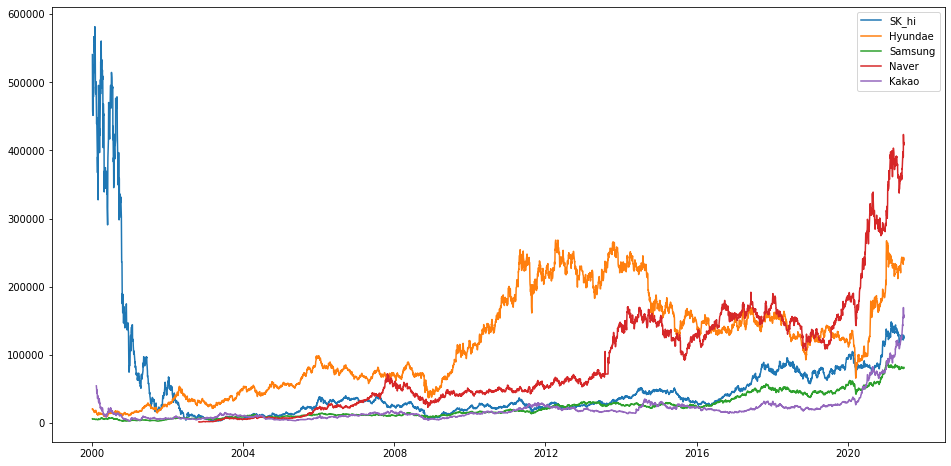

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(SK_hi['Date'], SK_hi['Close'],label='SK_hi')
plt.plot(Hyundae['Date'], Hyundae['Close'], label='Hyundae')
plt.plot(Samsung['Date'], Samsung['Close'], label='Samsung')
plt.plot(Naver['Date'], Naver['Close'], label='Naver')
plt.plot(Kakao['Date'], Kakao['Close'], label='Kakao')
plt.legend()
plt.show()

## 데이터셋 2016-01-01 이전,후로 나눔
아 괜히 5개 했어 개많아



In [11]:
year='2016-01-01'

In [12]:
train_SK_hi= SK_hi[(SK_hi['Date']<year)]
test_SK_hi= SK_hi[(SK_hi['Date']>=year)]
train_Hyundae= Hyundae[(Hyundae['Date']<year)]
test_Hyundae= Hyundae[(Hyundae['Date']>=year)]
train_Samsung= Samsung[(Samsung['Date']<year)]
test_Samsung= Samsung[(Samsung['Date']>=year)]
train_Naver= Naver[(Naver['Date']<year)]
test_Naver= Naver[(Naver['Date']>=year)]
train_Kakao= Kakao[(Kakao['Date']<year)]
test_Kakao= Kakao[(Kakao['Date']>=year)]

## 데이터 정규화

In [16]:
train_SK_hi_v = train_SK_hi.filter(['Close']).values
train_Hyundae_v = train_Hyundae.filter(['Close']).values
train_Samsung_v = train_Samsung.filter(['Close']).values
train_Naver_v = train_Naver.filter(['Close']).values
train_Kakao_v = train_Kakao.filter(['Close']).values

test_SK_hi_v = test_SK_hi.filter(['Close']).values
test_Hyundae_v = test_Hyundae.filter(['Close']).values
test_Samsung_v = test_Samsung.filter(['Close']).values
test_Naver_v = test_Naver.filter(['Close']).values
test_Kakao_v = test_Kakao.filter(['Close']).values

In [17]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

In [18]:
scaled_train_SK_hi = scalar.fit_transform(train_SK_hi_v)
scaled_train_Hyundae = scalar.fit_transform(train_Hyundae_v)
scaled_train_Samsung = scalar.fit_transform(train_Samsung_v)
scaled_train_Naver = scalar.fit_transform(train_Naver_v)
scaled_train_Kakao = scalar.fit_transform(train_Kakao_v)

scaled_test_SK_hi = scalar.fit_transform(test_SK_hi_v)
scaled_test_Hyundae = scalar.fit_transform(test_Hyundae_v)
scaled_test_Samsung = scalar.fit_transform(test_Samsung_v)
scaled_test_Naver = scalar.fit_transform(test_Naver_v)
scaled_test_Kakao = scalar.fit_transform(test_Kakao_v)

In [19]:
PAST_SET = 10

In [20]:
# 훈련 데이터는 전체 중 0.8의 비중 SK_hi
import math
SK_hi_len = math.ceil(len(scaled_train_SK_hi)*0.8)

In [21]:
X_train_SK_hi =[]
y_train_SK_hi =[]

for i in range(PAST_SET, len(scaled_train_SK_hi)):
  X_train_SK_hi.append(scaled_train_SK_hi[i-PAST_SET:i, 0])
  y_train_SK_hi.append(scaled_train_SK_hi[i,0])

X_train_SK_hi, y_train_SK_hi = np.array(X_train_SK_hi), np.array(y_train_SK_hi)

# LSTM은 3D
X_train_SK_hi = np.reshape(X_train_SK_hi, (X_train_SK_hi.shape[0], X_train_SK_hi.shape[1], 1))

In [22]:
# Hyundae
Hyundae_len = math.ceil(len(scaled_train_Hyundae)*0.8)

X_train_Hyundae =[]
y_train_Hyundae =[]

for i in range(PAST_SET, len(scaled_train_Hyundae)):
  X_train_Hyundae.append(scaled_train_Hyundae[i-PAST_SET:i, 0])
  y_train_Hyundae.append(scaled_train_Hyundae[i,0])

X_train_Hyundae, y_train_Hyundae = np.array(X_train_Hyundae), np.array(y_train_Hyundae)

# LSTM은 3D
X_train_Hyundae = np.reshape(X_train_Hyundae, (X_train_Hyundae.shape[0], X_train_Hyundae.shape[1], 1))

In [23]:
# Samsung
Hyundae_len = math.ceil(len(scaled_train_Hyundae)*0.8)

X_train_Hyundae =[]
y_train_Hyundae =[]

for i in range(PAST_SET, len(scaled_train_Hyundae)):
  X_train_Hyundae.append(scaled_train_Hyundae[i-PAST_SET:i, 0])
  y_train_Hyundae.append(scaled_train_Hyundae[i,0])

X_train_Hyundae, y_train_Hyundae = np.array(X_train_Hyundae), np.array(y_train_Hyundae)

# LSTM은 3D
X_train_Hyundae = np.reshape(X_train_Hyundae, (X_train_Hyundae.shape[0], X_train_Hyundae.shape[1], 1))

In [24]:
# Naver
Hyundae_len = math.ceil(len(scaled_train_Hyundae)*0.8)

X_train_Hyundae =[]
y_train_Hyundae =[]

for i in range(PAST_SET, len(scaled_train_Hyundae)):
  X_train_Hyundae.append(scaled_train_Hyundae[i-PAST_SET:i, 0])
  y_train_Hyundae.append(scaled_train_Hyundae[i,0])

X_train_Hyundae, y_train_Hyundae = np.array(X_train_Hyundae), np.array(y_train_Hyundae)

# LSTM은 3D
X_train_Hyundae = np.reshape(X_train_Hyundae, (X_train_Hyundae.shape[0], X_train_Hyundae.shape[1], 1))

In [25]:
# Kakao
Hyundae_len = math.ceil(len(scaled_train_Hyundae)*0.8)

X_train_Hyundae =[]
y_train_Hyundae =[]

for i in range(PAST_SET, len(scaled_train_Hyundae)):
  X_train_Hyundae.append(scaled_train_Hyundae[i-PAST_SET:i, 0])
  y_train_Hyundae.append(scaled_train_Hyundae[i,0])

X_train_Hyundae, y_train_Hyundae = np.array(X_train_Hyundae), np.array(y_train_Hyundae)

# LSTM은 3D
X_train_Hyundae = np.reshape(X_train_Hyundae, (X_train_Hyundae.shape[0], X_train_Hyundae.shape[1], 1))

## LSTM 모델

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_SK_hi.shape[1],1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

### SK_hi

In [28]:
model.fit(X_train_SK_hi, y_train_SK_hi, batch_size=15, epochs=5)

Epoch 1/5
269/269 [==============================] - 21s 8ms/step - loss: 0.0024
Epoch 2/5
269/269 [==============================] - 2s 7ms/step - loss: 4.7649e-04
Epoch 3/5
269/269 [==============================] - 2s 7ms/step - loss: 5.3663e-04
Epoch 4/5
269/269 [==============================] - 2s 8ms/step - loss: 3.8825e-04
Epoch 5/5
269/269 [==============================] - 2s 8ms/step - loss: 4.1359e-04


In [29]:
#test_SK_hi_len = math.ceil(len(scaled_test_SK_hi)*0.8)

X_test_SK_hi = []

for i in range(PAST_SET, len(scaled_test_SK_hi)):
  X_test_SK_hi.append(scaled_test_SK_hi[i-PAST_SET:i, 0])

X_test_SK_hi = np.array(X_test_SK_hi)

# LSTM은 3D
X_test_SK_hi = np.reshape(X_test_SK_hi, (X_test_SK_hi.shape[0], X_test_SK_hi.shape[1], 1))

In [30]:
y_test_SK_hi = test_SK_hi_v[0:1332]
y_test_SK_hi

array([[ 30150.],
       [ 30600.],
       [ 30750.],
       ...,
       [128000.],
       [127000.],
       [128500.]])

In [31]:
X_test_SK_hi.shape

(1332, 10, 1)

In [32]:
predictions_SK_hi = model.predict(X_test_SK_hi)

predictions_SK_hi = scalar.inverse_transform(predictions_SK_hi)
predictions_SK_hi

array([[ 17928.777],
       [ 17418.016],
       [ 17313.393],
       ...,
       [131753.81 ],
       [133165.48 ],
       [133765.98 ]], dtype=float32)

In [33]:
means_SK_hi = np.mean(predictions_SK_hi - y_test_SK_hi)
means_SK_hi

-1198.5716637047203

In [34]:
rmse_SK_hi = np.sqrt(-means_SK_hi)
rmse_SK_hi

34.620393754328106

In [42]:
valid_SK_hi = test_SK_hi[['Date','Close']]
valid_SK_hi = valid_SK_hi[0:1332]
valid_SK_hi['Predictions'] = predictions_SK_hi
valid_SK_hi

,Date,Close,Predictions
4045,2016-01-04,30150.0,17928.777344
4046,2016-01-05,30600.0,17418.015625
4047,2016-01-06,30750.0,17313.392578
4048,2016-01-07,30200.0,17090.908203
4049,2016-01-08,29700.0,16823.111328
...,...,...,...
5372,2021-06-09,122500.0,131730.359375
5373,2021-06-10,123000.0,131245.296875
5374,2021-06-11,128000.0,131753.812500
5375,2021-06-14,127000.0,133165.484375


In [48]:
valid_SK_hi['Date'] = pd.to_datetime(valid_SK_hi['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


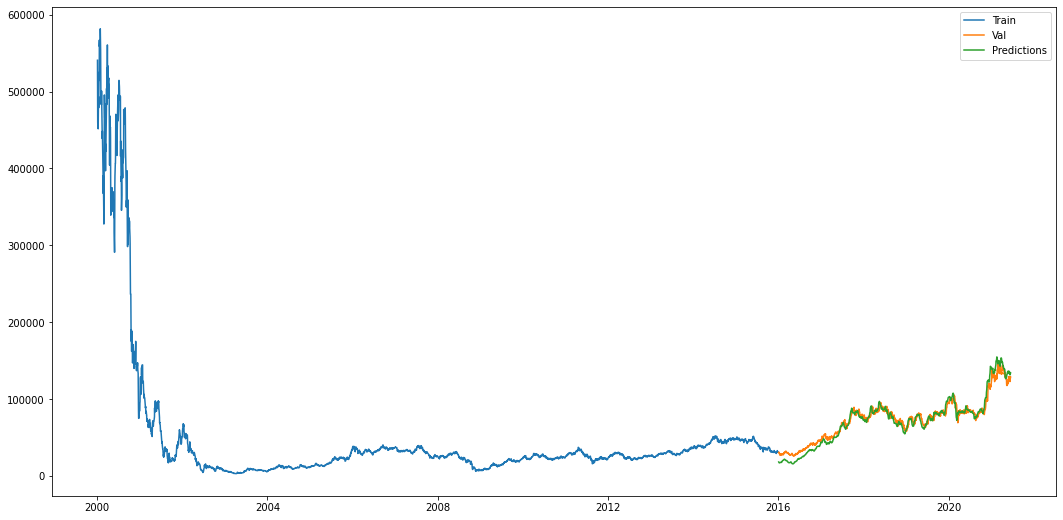

In [51]:
plt.figure(figsize=(18,9))
plt.plot(train_SK_hi['Date'],train_SK_hi['Close'])
plt.plot(valid_SK_hi['Date'], valid_SK_hi[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


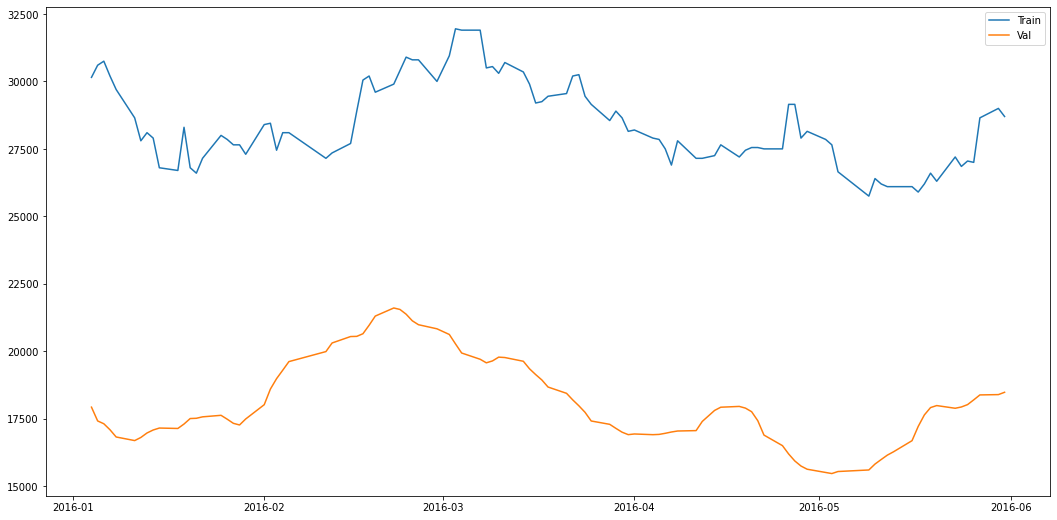

In [52]:
plt.figure(figsize=(18,9))
plt.plot(valid_SK_hi['Date'][:100], valid_SK_hi[['Close','Predictions']][:100])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')